<a href="https://colab.research.google.com/github/pj2111/Assignments/blob/master/assignment_data/warmup_pytorch_modeldesign_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch datasets > /dev/null

# 1) Design the model (input, output size and forward pass)
    # Input, target data must have shape of m x n, i.e both must have features
    # Model needs to designed by keeping the feature length in mind, as these will be processed
# 2) construct loss and optimizer
    # torch.nn module contains the variety of Loss Criterions
    # torch.optim module contains various optimizers
# 3) training loop

###  - forward pass: compute prediction
    # loss criterion is called with the target and predicted values

###  - backward pass: compute gradient & update weights
    # optimizers will take care of gradient, weight updates of the model
    # remember to pass optimizer.zero_grad() for the gradient to be
    # reset

### Start by working on bare-bones matrix model LinReg Training

In [3]:
import torch

In [4]:
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10, 12], dtype=torch.float32)

In [14]:
# here is the weights of the model, simple one-c tensor with gradient calc ability

w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)

In [5]:
def forward(x):
  return x * w

In [6]:
def loss(y, y_pred):
  return ((y_pred - y) ** 2).mean()

In [7]:
import numpy as np
# Gradient calculation is done using Numpy
def gradient(x, y, y_pred):
  return np.dot(2 * x, y_pred - y).mean()

In [8]:
# Try predict what is the output before model training

print(f"Predict with simple forward fn: {forward(5)}")

Predict with simple forward fn: 0.0


In [11]:
# beginning the training process

learning_rate = 0.01
n_iters = 30

In [ ]:
# gradients calculated using numpy method
w = 0.0

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(y , y_pred)
  dw = gradient(X, y, y_pred)
  w -= learning_rate * dw
  if epoch % 1 == 0:
    print(f"epoch {epoch + 1}: w= {w: 3f} loss: {l: 8f}")

In [13]:
print(f"Prediction after training f(5) = {forward(5)}")

Prediction after training f(5) = 9.999804496765137


In [ ]:
# gradients calculated using tensor backward() method

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(y , y_pred)
  l.backward()  # this part is done by pytorch
  with torch.no_grad():
    w -= learning_rate * w.grad
  w.grad.zero_()
  if epoch % 1 == 0:
    print(f"epoch {epoch + 1}: w= {w: 3f} loss: {l: 8f}")

#### Going full torch mode

In [18]:
import torch
import torch.nn as nn

In [17]:
# the shape of the input is different, when used with torch models
X = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10]], dtype=torch.float32)

# n_features is the cols persent in each datapoint, both inputs & targets
n_samples, n_features = X.shape
x_test = torch.tensor([5],
                      dtype=torch.float32)

In [19]:
# Models are basic python classes with the blueprint.

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(n_features, n_features)

In [20]:
loss = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(),
                        lr=0.01)

print(f"prediction before training: f(5)= {model(x_test).item():.3f}")
# training
learning_rate = 0.01
n_iters = 30

prediction before training: f(5)= 1.089


In [ ]:
# Looking at the LinReg Model Training

for epoch in range(n_iters):
    # prediction to be extracted
    y_pred = model(X)
    # compute loss
    l = loss(Y, y_pred)
    # get gradient ==> backward()
    l.backward()  # will calculate the grad w.r.t 'w'
    # update weights is done by the optimizert
    # with torch.no_grad():
    #    w -= learning_rate * w.grad
    optim.step()
    # make the accumulated grad to 0
    optim.zero_grad()
    # printing epoch
    if epoch % 1 == 0:
        [w, b] = model.parameters()
        # observe how the weights are extracted to display
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss: {l:.8f}")

In [22]:
print(f"prediction after training: f(5)= {model(x_test).item():.3f}")

prediction after training: f(5)= 9.625


### Fine Tuning model from Scratch with Mnist Data

This part of the notebook is self-contained, and can be extracted into a script for execution

- MNIST data loader

- Dataload and transformation

- Design Multi-layer neural net with activation function

- Loss and Optimiser declaration

- Training loop with batches

- model evaluation using accuracy

- enable GPU support

In [24]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn import functional as F

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
# preliminary data
input_size = 784
hidden_size = 100

num_classes = 10
num_epochs = 2

batch_size = 100
learning_rate = 0.001

In [30]:
raw_train = torchvision.datasets.MNIST(root='./data', train=True, download=False)
raw_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [37]:

raw_train[10][0]

In [ ]:
from IPython.display import Image
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(raw_train[0][0]).show()

In [38]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         shuffle=False)

In [39]:
# usage of iterator / generator
examples = iter(train_loader)

samples, labels = next(examples)

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


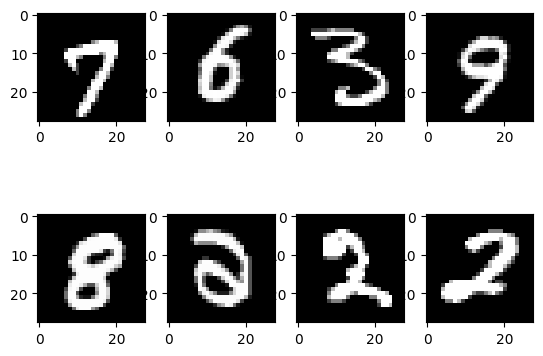

In [40]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [41]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [42]:
model = NeuralNet(input_size=input_size,
                  hidden_size=hidden_size,
                  num_classes=num_classes)

In [43]:
criterion = nn.CrossEntropyLoss()

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

running_loss = 0.0

running_corrects = 0

In [ ]:
for epoch in range(num_epochs):
    print(f"entering epoch: {epoch + 1}\n")
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

    # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

    # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_corrects += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print(f"epoch: {epoch+1} / {num_epochs}, step {i + 1} / {n_total_steps} loss= {loss.item():.3f}")
            running_loss = 0.0
            running_corrects = 0

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples =0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100 * n_correct / n_samples
    print(f"accuracy = {acc}")